<a href="https://colab.research.google.com/github/WSzymczak23/projekty-SDA/blob/main/Copy_of_projekt_klasyfikacja2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import bibliotek

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns




Wczytanie danych

In [ ]:
attrition = pd.read_csv('/content/attrition.csv')
df1 = pd.read_csv('/content/df1.csv')
df2 = pd.read_csv('/content/df2.csv')
sample_output = pd.read_csv('/content/sample_output.csv')

Sprawdzenie danych

In [ ]:
sample_output.sample(20)

,EmployeeNumber,Attrition
93,100093,1
23,100023,1
102,100102,1
13,100013,1
30,100030,1
14,100014,1
75,100075,1
125,100125,1
116,100116,1
94,100094,1


Łączenie danych df1 i df2

In [ ]:
df = pd.merge(df1, df2, on="EmployeeNumber", how="left")

Usunięcie wartości odstających w kolumnach: 'Age', 'DistanceFromHome','TotalWorkingYears', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'YearsInCurrentRole'

In [ ]:
df[df['DistanceFromHome'] > 100]
selRows = df[df['DistanceFromHome'] > 100].index
df = df.drop(selRows, axis=0)
df.shape

(2351, 49)

In [ ]:
df[df['Age'] > 100]
selRows = df[df['Age'] > 100].index
df = df.drop(selRows, axis=0)
df.shape

(2351, 49)

In [ ]:
df[df['TotalWorkingYears'] > 100]
selRows = df[df['TotalWorkingYears'] > 100].index
df = df.drop(selRows, axis=0)
df.shape

(2351, 49)

In [ ]:
df[df['YearsAtCompany'] > 100]
selRows = df[df['YearsAtCompany'] > 100].index
df = df.drop(selRows, axis=0)
df.shape

(2351, 49)

In [ ]:
df[df['YearsSinceLastPromotion'] > 100]
selRows = df[df['YearsSinceLastPromotion'] > 100].index
df = df.drop(selRows, axis=0)
df.shape

(2351, 49)

In [ ]:
df[df['YearsWithCurrManager'] > 100]
selRows = df[df['YearsWithCurrManager'] > 100].index
df = df.drop(selRows, axis=0)
df.shape

(2351, 49)

In [ ]:
df[df['YearsInCurrentRole'] > 50]
selRows = df[df['YearsInCurrentRole'] > 50].index
df = df.drop(selRows, axis=0)

Sprawdzenie czy występują puste wartości

In [ ]:
df.isna().sum() 

EmployeeNumber                       0
Age                                  0
DailyRate                            0
DistanceFromHome                     0
Education                            0
EmployeeCount                        0
EnvironmentSatisfaction              0
HourlyRate                           0
JobInvolvement                       0
JobLevel                             0
JobSatisfaction                      0
MonthlyIncome                        0
MonthlyRate                          0
NumCompaniesWorked                   0
OverTime                             0
PercentSalaryHike                    0
PerformanceRating                    0
RelationshipSatisfaction             0
StandardHours                        0
StockOptionLevel                     0
TotalWorkingYears                    0
TrainingTimesLastYear                0
WorkLifeBalance                      0
YearsAtCompany                       0
YearsInCurrentRole                   0
YearsSinceLastPromotion  

In [ ]:
df['Attrition'].unique()

array(['No', 'Yes', nan], dtype=object)

Usunięcie pustych wartości

In [ ]:
df = df.dropna(axis=0)
df


,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,104,30.0,852.0,1.0,1.0,1.0,4.0,55.0,2.0,2.0,4.0,5126.0,15998.0,1.0,1,12.0,3.0,3.0,80.0,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,0,61512.0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
1,1638,38.0,397.0,2.0,2.0,1.0,4.0,54.0,2.0,3.0,3.0,7756.0,14199.0,3.0,1,19.0,3.0,4.0,80.0,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,0,93072.0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,164,26.0,841.0,6.0,3.0,1.0,3.0,46.0,2.0,1.0,2.0,2368.0,23300.0,1.0,0,19.0,3.0,3.0,80.0,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,0,28416.0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
3,395,28.0,1117.0,8.0,2.0,1.0,4.0,66.0,3.0,1.0,4.0,3310.0,4488.0,1.0,0,21.0,4.0,4.0,80.0,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,0,39720.0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,53,35.0,464.0,4.0,2.0,1.0,3.0,75.0,3.0,1.0,4.0,1951.0,10910.0,1.0,0,12.0,3.0,3.0,80.0,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,0,23412.0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4425,7956,29.0,1210.0,2.0,3.0,1.0,1.0,78.0,2.0,2.0,2.0,6644.0,3687.0,2.0,0,19.0,3.0,2.0,80.0,2.0,10.0,2.0,3.0,0.0,0.0,0.0,0.0,1,79728.0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0
4426,7957,29.0,1210.0,2.0,3.0,1.0,1.0,78.0,2.0,2.0,2.0,6644.0,3687.0,2.0,0,19.0,3.0,2.0,80.0,2.0,10.0,2.0,3.0,0.0,0.0,0.0,0.0,1,79728.0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0
4427,7958,29.0,1210.0,2.0,3.0,1.0,1.0,78.0,2.0,2.0,2.0,6644.0,3687.0,2.0,0,19.0,3.0,2.0,80.0,2.0,10.0,2.0,3.0,0.0,0.0,0.0,0.0,1,79728.0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0
4431,7962,55.0,725.0,2.0,3.0,1.0,4.0,78.0,3.0,5.0,1.0,19859.0,21199.0,5.0,1,13.0,3.0,4.0,80.0,1.0,24.0,2.0,3.0,5.0,2.0,1.0,4.0,1,238308.0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0


In [ ]:
df['Attrition'].unique()

array([0, 1])

In [ ]:
df.isna().sum() 

EmployeeNumber              0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

Zmienna 'Attrition'

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


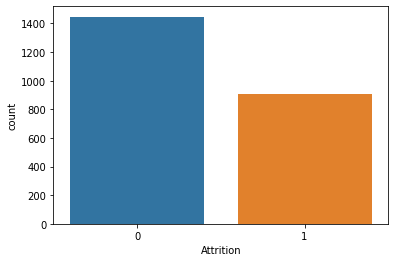

In [ ]:
import seaborn as sns
sns.countplot(df['Attrition'])

In [ ]:
df['Attrition'].value_counts()

0    1447
1     904
Name: Attrition, dtype: int64

Sprawdzenie typów zmiennych

In [ ]:
df.dtypes 

EmployeeNumber                int64
Age                         float64
BusinessTravel               object
DailyRate                   float64
Department                   object
DistanceFromHome            float64
Education                   float64
EducationField               object
EmployeeCount               float64
EnvironmentSatisfaction     float64
Gender                       object
HourlyRate                  float64
JobInvolvement              float64
JobLevel                    float64
JobRole                      object
JobSatisfaction             float64
MaritalStatus                object
MonthlyIncome               float64
MonthlyRate                 float64
NumCompaniesWorked          float64
Over18                       object
OverTime                     object
PercentSalaryHike           float64
PerformanceRating           float64
RelationshipSatisfaction    float64
StandardHours               float64
StockOptionLevel            float64
TotalWorkingYears           

Zmienna 'Age'

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


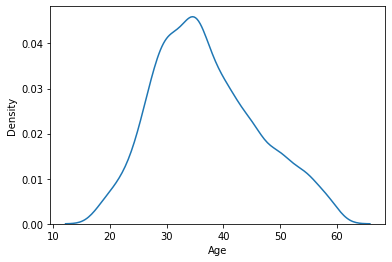

In [ ]:
sns.distplot(df['Age'],hist=False)
plt.show()

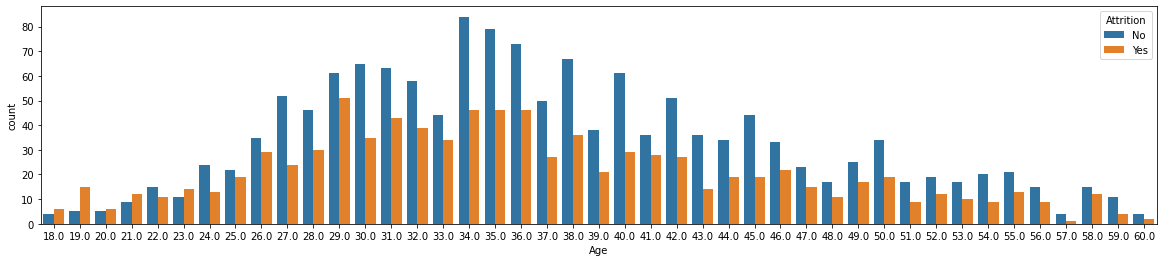

In [ ]:
plt.subplots(figsize=(20,4))
sns.countplot(x='Age', hue='Attrition', data=df )

Zmienne kategoryczne - get dumies

In [ ]:
categorical_features = df.select_dtypes(include=[np.object]).columns
print("total categorical_features",len(categorical_features))

total categorical_features 0


In [ ]:
df[categorical_features].sample(10)

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime,Attrition
807,Travel_Frequently,Sales,Marketing,Female,Sales Executive,Single,Y,No,No
815,Travel_Rarely,Research & Development,Life Sciences,Male,Healthcare Representative,Divorced,Y,Yes,No
1209,Travel_Frequently,Research & Development,Life Sciences,Female,Laboratory Technician,Married,Y,Yes,Yes
936,Travel_Rarely,Research & Development,Life Sciences,Male,Research Scientist,Divorced,Y,No,No
398,Travel_Rarely,Sales,Marketing,Male,Sales Executive,Divorced,Y,No,No
1132,Travel_Rarely,Sales,Marketing,Male,Sales Representative,Married,Y,Yes,No
2098,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Single,Y,Yes,Yes
3477,Travel_Rarely,Sales,Life Sciences,Male,Sales Executive,Married,Y,No,Yes
1762,Travel_Rarely,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No,No
834,Travel_Rarely,Research & Development,Life Sciences,Male,Laboratory Technician,Single,Y,No,No


Zamiana wartości kategorycznych

In [ ]:
df['Attrition'] = df['Attrition'].map({"Yes": 1, "No": 0})
df['OverTime'] = df['OverTime'].map({"Yes": 1, "No": 0})
df = pd.get_dummies(df, columns=["BusinessTravel", "Department", "EducationField",	"Gender", "JobRole", "MaritalStatus","Over18"], drop_first=True)


In [ ]:
df.corr()

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
EmployeeNumber,1.000000,0.006251,-0.024644,0.297783,0.009113,NaN,-0.008039,0.013878,0.001120,-0.024763,-0.004486,-0.011485,-0.000124,-0.011382,-0.013656,-0.012635,-0.011297,0.029616,NaN,-0.026113,-0.019061,-0.017402,0.006368,-0.007463,-0.010333,-0.014276,0.012016,0.493766,-0.011485,-0.018608,0.012347,0.026592,-0.023372,0.002211,-0.039247,0.004227,0.022174,0.014359,0.030461,-0.004773,0.016498,-0.035479,-0.006238,0.025617,0.029903,-0.015469,0.002282,0.023660,0.009527
Age,0.006251,1.000000,0.005821,0.003372,0.208733,NaN,0.026263,-0.010938,0.022089,0.489219,0.005342,0.477343,0.031037,0.268167,0.047553,-0.029599,-0.020123,0.079037,NaN,0.028309,0.666762,-0.010649,-0.026197,0.327459,0.227185,0.231550,0.213116,-0.053804,0.477343,-0.018181,-0.003730,0.014848,-0.035564,-0.000152,0.048890,0.013500,-0.033529,-0.048108,-0.004599,0.004094,-0.136761,0.247856,0.054209,0.208367,-0.146636,0.000726,-0.159393,0.082346,-0.119631
DailyRate,-0.024644,0.005821,1.000000,-0.044432,-0.004049,NaN,0.002726,0.005510,0.033420,0.023307,0.027461,0.028426,-0.021700,0.045497,-0.001100,0.041680,0.019070,0.013883,NaN,0.056398,0.021744,0.016637,-0.044371,-0.020105,0.037487,-0.012779,-0.010850,-0.034580,0.028426,-0.007886,-0.010917,0.022670,0.001534,0.022601,-0.069804,0.026429,-0.036476,0.043336,0.024037,-0.038020,-0.013994,0.006721,0.003852,0.003262,-0.019247,0.008928,-0.009876,0.040199,-0.105070
DistanceFromHome,0.297783,0.003372,-0.044432,1.000000,-0.013572,NaN,-0.016943,-0.051862,0.001501,-0.050651,0.010410,-0.037251,0.000071,-0.021965,0.006537,-0.061474,-0.039741,-0.036030,NaN,0.019308,-0.033244,0.018608,0.013788,-0.007782,0.003119,0.008802,0.035629,0.152137,-0.037251,0.051127,-0.039632,0.017011,-0.031899,-0.004001,-0.025860,0.013156,0.004887,-0.013895,-0.028178,0.017017,0.064873,-0.020530,0.006054,0.000011,-0.033632,-0.064624,0.079131,-0.005014,0.031125
Education,0.009113,0.208733,-0.004049,-0.013572,1.000000,NaN,-0.021846,-0.000847,0.026775,0.103714,-0.003221,0.093646,-0.038381,0.116639,-0.009930,-0.022643,-0.043899,-0.002086,NaN,0.035220,0.143877,-0.026365,-0.009849,0.088555,0.072558,0.062696,0.079129,-0.018559,0.093646,-0.015909,0.011925,-0.032560,0.027547,0.003966,0.049194,-0.029707,0.022364,-0.038046,-0.004335,0.000433,-0.084755,0.022665,-0.011491,0.045778,0.018289,0.063412,-0.083780,-0.010461,-0.008400
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EnvironmentSatisfaction,-0.008039,0.026263,0.002726,-0.016943,-0.021846,NaN,1.000000,-0.066099,-0.004067,0.010479,-0.004454,-0.004001,0.045435,-0.022619,0.062487,-0.022951,-0.007066,0.031244,NaN,0.008522,0.000501,-0.025640,0.061101,0.020167,0.034107,0.026391,0.011759,-0.045117,-0.004001,-0.030029,0.020390,0.044193,-0.054776,-0.052074,-0.032393,-0.010815,0.082164,0.062447,0.029237,0.001019,0.000532,-0.001948,0.068997,-0.042118,0.001487,-0.042406,-0.030282,-0.021859,0.010151
HourlyRate,0.013878,-0.010938,0.005510,-

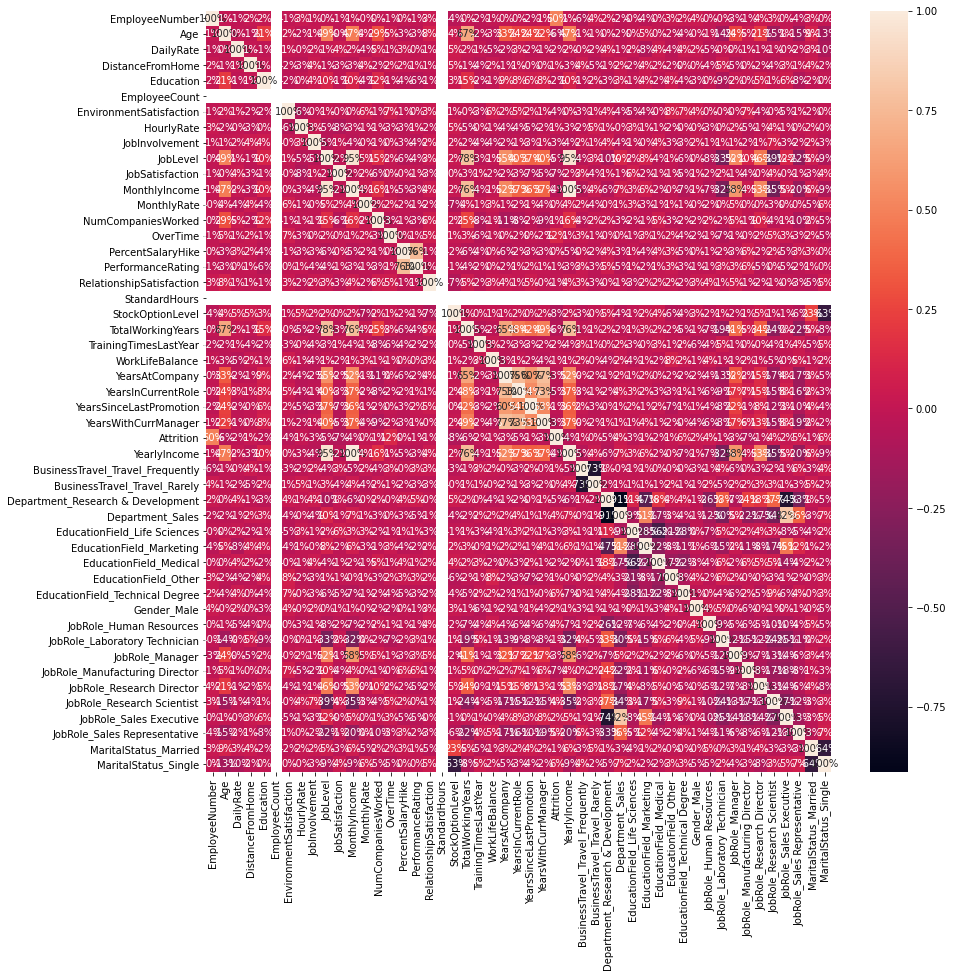

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,14))
sns.heatmap(df.corr(), annot=True, fmt='.0%' )

In [ ]:
df.sample(10)

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
361,165,58.0,147.0,23.0,4.0,1.0,4.0,94.0,3.0,3.0,4.0,10312.0,3465.0,1.0,0,12.0,3.0,4.0,80.0,1.0,40.0,3.0,2.0,40.0,10.0,15.0,6.0,1,123744.0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1296,689,37.0,482.0,3.0,3.0,1.0,3.0,36.0,3.0,3.0,3.0,9434.0,9606.0,1.0,0,15.0,3.0,3.0,80.0,1.0,10.0,2.0,3.0,10.0,7.0,7.0,8.0,0,113208.0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0
4289,7820,37.0,674.0,13.0,3.0,1.0,1.0,47.0,3.0,2.0,4.0,4285.0,3031.0,1.0,0,17.0,3.0,1.0,80.0,0.0,10.0,2.0,3.0,10.0,8.0,3.0,7.0,1,51420.0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0
3043,6574,34.0,697.0,102637.0,4.0,1.0,3.0,40.0,2.0,1.0,4.0,2979.0,22478.0,3.0,0,17.0,3.0,4.0,80.0,3.0,6.0,2.0,3.0,0.0,0.0,0.0,0.0,0,35748.0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
2804,6335,32.0,585.0,815600.0,3.0,1.0,1.0,56.0,3.0,1.0,3.0,3433.0,17360.0,6.0,0,13.0,3.0,1.0,80.0,1.0,10.0,3.0,2.0,5.0,2.0,1.0,3.0,1,41196.0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
679,850,27.0,443.0,3.0,3.0,1.0,4.0,50.0,3.0,1.0,4.0,1706.0,16571.0,1.0,0,11.0,3.0,3.0,80.0,3.0,0.0,6.0,2.0,0.0,0.0,0.0,0.0,0,20472.0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0
1171,46,43.0,1273.0,2.0,2.0,1.0,4.0,72.0,4.0,1.0,3.0,2645.0,21923.0,1.0,0,12.0,3.0,4.0,80.0,2.0,6.0,3.0,2.0,5.0,3.0,1.0,4.0,0,31740.0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4280,7811,33.0,1111.0,249810.0,1.0,1.0,2.0,61.0,3.0,2.0,4.0,9998.0,19293.0,6.0,0,13.0,3.0,1.0,80.0,0.0,8.0,2.0,4.0,5.0,4.0,1.0,2.0,1,119976.0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
2446,5977,34.0,546.0,10.0,3.0,1.0,2.0,83.0,3.0,1.0,2.0,2008.0,6896.0,1.0,0,14.0,3.0,2.0,80.0,2.0,1.0,3.0,3.0,1.0,0.0,1.0,0.0,1,24096.0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
4051,7582,54.0,397.0,19.0,4.0,1.0,3.0,88.0,3.0,3.0,2.0,10725.0,6729.0,2.0,0,15.0,3.0,3.0,80.0,1.0,16.0,1.0,4.0,9.0,7.0,7.0,1.0,1,128700.0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0


Wzynaczenie y i X

In [ ]:
y = df['Attrition']
X=df[['OverTime', 'Age', 'MonthlyIncome', 'StockOptionLevel']]
#X = df.drop('Attrition',axis=1)

Regresja logistyczna

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt 

# use train/test split with different random_state values
# we can change the random_state values that changes the accuracy scores
# the scores change a lot, this is why testing scores is a high-variance estimate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

# check classification scores of logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

from sklearn.model_selection import GridSearchCV

# Specify L1 regularization
lr = LogisticRegression(penalty='l1', solver='liblinear')

# Instantiate the GridSearchCV object and run the search
searcher = GridSearchCV(lr, {'C':[0.002, 0.02, 0.2, 2, 20,200,000]})
searcher.fit(X_train, y_train)

# Report the best parameters
print("Best CV params", searcher.best_params_)

# Find the number of nonzero coefficients (selected features)
best_lr = searcher.best_estimator_
coefs = best_lr.coef_
print("Total number of features:", coefs.size)
print("Number of selected features:", np.count_nonzero(coefs))

y_pred_proba = searcher.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(searcher.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(searcher.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(searcher.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))
idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95



plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

ValueError: ignored

Metryki

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_test = accuracy_score(y_test, y_pred)
precision_test = precision_score(y_test, y_pred)
recall_test = recall_score(y_test, y_pred)
f1_test = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy_test}')
print(f'Precision: {precision_test}')
print(f'Recall: {recall_test}')
print(f'F1-Score: {f1_test}')

Accuracy: 0.7507598784194529
Precision: 0.65814696485623
Recall: 0.7832699619771863
F1-Score: 0.7152777777777777


In [ ]:
from sklearn.ensemble import RandomForestClassifier


# use train/test split with different random_state values
# we can change the random_state values that changes the accuracy scores
# the scores change a lot, this is why testing scores is a high-variance estimate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# check classification scores of logistic regression
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
#y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

from sklearn.model_selection import GridSearchCV

# Specify L1 regularization
lr = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 2)

# Instantiate the GridSearchCV object and run the search
searcher = GridSearchCV(lr, {'C':[0.001, 0.01, 0.1, 1, 10,100,1000]})
searcher.fit(X_train, y_train)

# Report the best parameters
print("Best CV params", searcher.best_params_)

# Find the number of nonzero coefficients (selected features)
best_lr = searcher.best_estimator_
coefs = best_lr.coef_
print("Total number of features:", coefs.size)
print("Number of selected features:", np.count_nonzero(coefs))

y_pred_proba = searcher.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred)
print('Train/Test split results:')
print(searcher.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(searcher.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred))
print(searcher.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))
idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95



plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

ValueError: ignored

In [ ]:
y.value_counts()